<a href="https://colab.research.google.com/github/FernandoGuillen-lab/DataScience/blob/main/Deep_learning_con_Tensor_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import random as rn
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import PIL
import pathlib
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom, Dense, Dropout
from tensorflow.keras.models import Sequential

In [ ]:

imagenes=[]
etiquetas=[]
img_tamaño= 150

dir_base="/content/drive/MyDrive/Colab Notebooks/DeepLearning TensorFlow/objetos"
dir_avion= dir_base+"/avion"
dir_cohete= dir_base+"/cohete"
dir_dron= dir_base+"/dron"
dir_helicoptero= dir_base+"/helicoptero"
dir_jet= dir_base+"/jet"
dir_misil= dir_base+"/misil"

def obtener_extencion_archivo(DIR):
  ext=[]
  for archivo in os.listdir(DIR):
    nom_archivo, ext_archivo= os.path.splitext(archivo)
    ext.append(ext_archivo)
  extensiones=set(ext)
  print(extensiones)


In [ ]:
obtener_extencion_archivo(dir_avion)
obtener_extencion_archivo(dir_cohete)
obtener_extencion_archivo(dir_dron)
obtener_extencion_archivo(dir_helicoptero)
obtener_extencion_archivo(dir_jet)
obtener_extencion_archivo(dir_misil)

{'.webp', '.JPG', '.jpg', '.bin', '.gif', '.jpeg', '.2', '.png', '.aspx'}
{'.webp', '.JPG', '.jpg', '.gif', '.php', '.img', '.PNG', '.jpeg', '.66dc5b9c87', '.png', '.cms', '.axd', '.aspx'}
{'.webp', '.gif', '.jpg', '.JPG', '.php', '.PNG', '.jpeg', '.png', '.cms', '.ashx', '.5'}
{'.gif', '.JPG', '.jpg', '.img', '.webp', '.PNG', '.php', '.jfif', '.jpeg', '.cls', '.png', '.ashx', '.axd', '.aspx', '.dpg'}
{'.webp', '.JPG', '.jpg', '.gif', '.jp2', '.php', '.PNG', '.img', '.5', '.jpeg', '.66dc5b9c87', '.png', '.axd', '.aspx'}
{'.gif', '.JPG', '.jpg', '.webp', '.PNG', '.jpeg', '.png', '.cms', '.ashx', '.5', '.aspx', '.JPEG'}


In [ ]:
def imagen_valida(archivo, extensiones=[".jpeg",".jpg",".png",".gif"]):
  nom_archivo, ext_archivo=os.path.splitext(archivo)
  es_archivo= os.path.isfile(archivo)
  es_imagen= ext_archivo.lower() in extensiones
  return es_archivo and es_imagen

In [ ]:
def construir_base_datos(etiqueta,DIR):
  for archivo in tqdm(os.listdir(DIR)):
    ruta= os.path.join(DIR,archivo)
    if imagen_valida(ruta):
      img= tf.keras.preprocessing.image.load_img(ruta,color_mode="rgb")
      matriz_img= tf.keras.preprocessing.image.img_to_array(img)
      matriz_img= tf.image.resize(matriz_img/255, [img_tamaño, img_tamaño])
      imagenes.append(matriz_img.numpy())
      etiquetas.append(etiqueta)


In [ ]:
clases= ["Avion","Cohete","Dron","Helicoptero","Jet","Misil"]
construir_base_datos(0,dir_avion)
print("\n",len(etiquetas))
construir_base_datos(1,dir_cohete)
print("\n",len(etiquetas))
construir_base_datos(2,dir_dron)
print("\n",len(etiquetas))
construir_base_datos(3,dir_helicoptero)
print("\n",len(etiquetas))
construir_base_datos(4,dir_jet)
print("\n",len(etiquetas))
construir_base_datos(5,dir_misil)
print("\n",len(etiquetas))

100%|██████████| 1424/1424 [02:31<00:00,  9.37it/s]



 1413


100%|██████████| 1186/1186 [01:28<00:00, 13.47it/s]



 2588


100%|██████████| 1332/1332 [01:50<00:00, 12.07it/s]



 3907


100%|██████████| 1387/1387 [01:51<00:00, 12.46it/s]



 5273


100%|██████████| 1867/1867 [02:45<00:00, 11.27it/s]



 7121


100%|██████████| 1334/1334 [01:43<00:00, 12.85it/s]


 8439


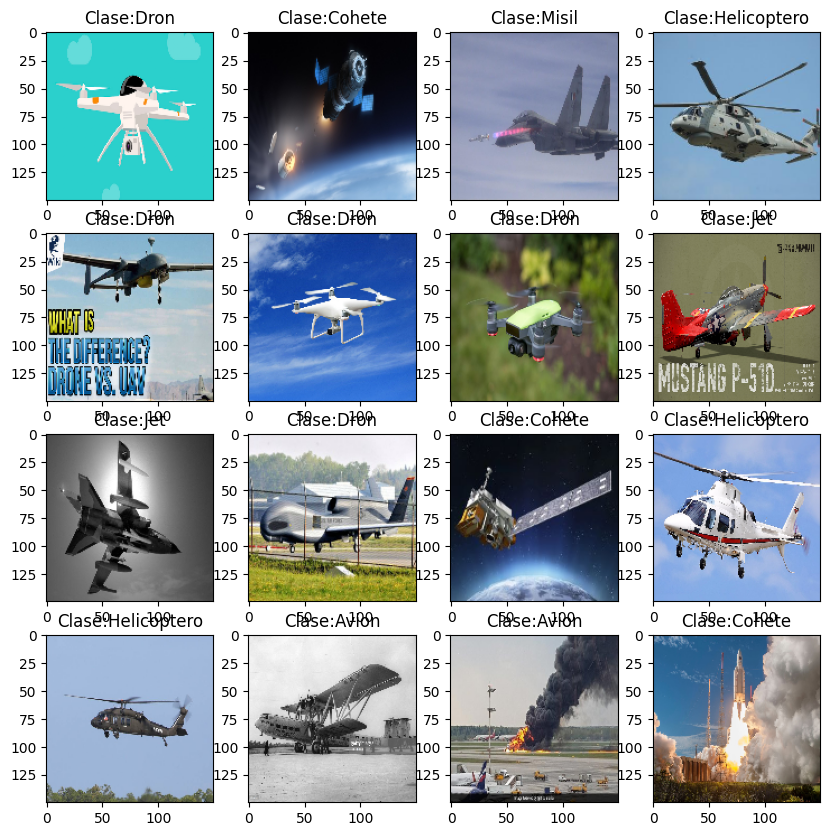

In [ ]:
fig, ax= plt.subplots(4,4)
fig.set_size_inches(10,10)
for i in range(4):
  for j in range(4):
    l= rn.randint(0, len(etiquetas))
    ax[i,j].imshow(imagenes[l])
    ax[i,j].set_title("Clase:"+clases[etiquetas[l]])

In [ ]:
img_entrenamiento, img_prueba, etq_entrenamiento, etq_prueba= train_test_split(imagenes, etiquetas, test_size= .2, random_state= 42)

img_entrenamiento= np.array(img_entrenamiento)
img_prueba= np.array(img_prueba)
etq_entrenamiento= np.array(etq_entrenamiento)
etq_prueba= np.array (etq_prueba)



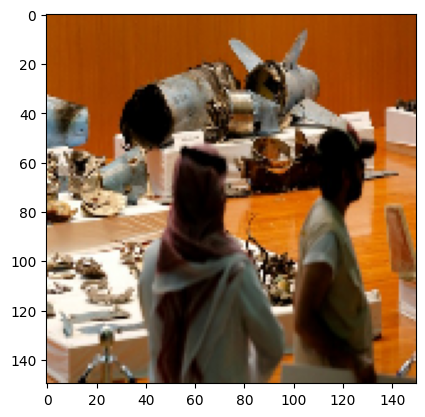

<Figure size 640x480 with 0 Axes>

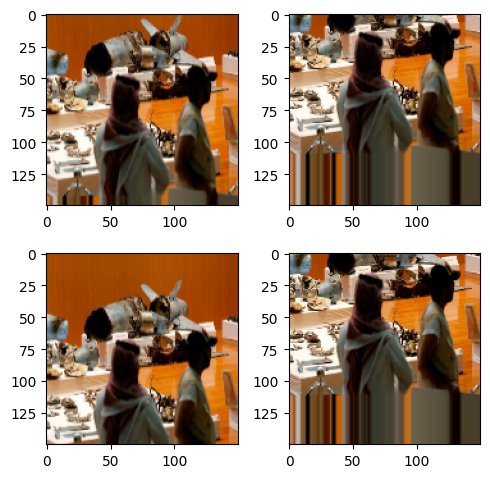

In [ ]:
data= img_prueba[3]
samples= np.expand_dims(data, 0)
plt.figure()
plt.imshow(data)
plt.show()
plt.figure()
fig,ax= plt.subplots(2,2)
fig.set_size_inches(5,5)
datagen= tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range= .3)
it= datagen.flow(samples,batch_size= 1)
for i in range(2):
  for j in range(2):
    batch= it.next()
    image=batch[0]
    ax[i,j].imshow(image)
    plt.tight_layout()

In [ ]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [ ]:
#Primer modelo
modelo= tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(5,5),activation= "relu", padding= "Same", input_shape= (150,150,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation= "relu", padding= "Same"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(96,(3,3),activation= "relu", padding= "Same"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation= "relu", padding= "Same"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation= "relu"),
    tf.keras.layers.Dense(128,activation= "relu"),
    tf.keras.layers.Dense(32,activation= "relu"),
    tf.keras.layers.Dense(6,activation= "softmax"),
])

modelo.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 96)       

In [ ]:
modelo.compile(optimizer= "adam", loss= "sparse_categorical_crossentropy", metrics= ["accuracy"])
evol= modelo.fit(img_entrenamiento, etq_entrenamiento, validation_data= (img_prueba, etq_prueba), epochs=70, batch_size=128)

Epoch 1/70
53/53 [==============================] - 16s 175ms/step - loss: 1.7698 - accuracy: 0.2257 - val_loss: 1.7048 - val_accuracy: 0.2672
Epoch 2/70
53/53 [==============================] - 5s 100ms/step - loss: 1.6446 - accuracy: 0.3112 - val_loss: 1.5895 - val_accuracy: 0.3714
Epoch 3/70
53/53 [==============================] - 5s 101ms/step - loss: 1.5555 - accuracy: 0.3647 - val_loss: 1.5429 - val_accuracy: 0.4064
Epoch 4/70
53/53 [==============================] - 5s 102ms/step - loss: 1.4650 - accuracy: 0.4148 - val_loss: 1.4958 - val_accuracy: 0.4040
Epoch 5/70
53/53 [==============================] - 5s 102ms/step - loss: 1.3881 - accuracy: 0.4450 - val_loss: 1.4473 - val_accuracy: 0.4242
Epoch 6/70
53/53 [==============================] - 5s 103ms/step - loss: 1.2744 - accuracy: 0.5029 - val_loss: 1.4410 - val_accuracy: 0.4597
Epoch 7/70
53/53 [==============================] - 5s 103ms/step - loss: 1.1366 - accuracy: 0.5584 - val_loss: 1.4389 - val_accuracy: 0.4461
Epoch

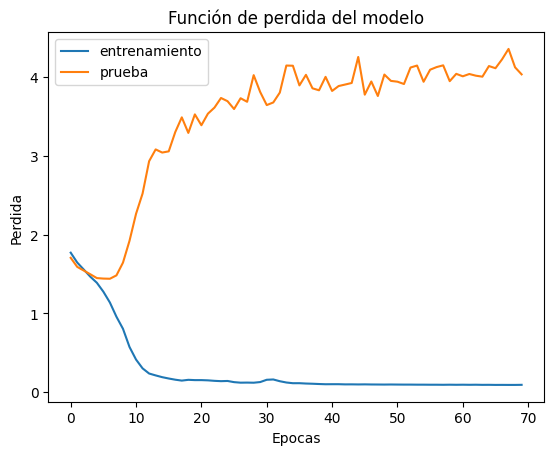

In [ ]:
plt.figure()
plt.plot(evol.history["loss"])
plt.plot(evol.history["val_loss"])
plt.title("Función de perdida del modelo")
plt.ylabel("Perdida")
plt.xlabel("Epocas")
plt.legend(["entrenamiento", "prueba"])
plt.show()

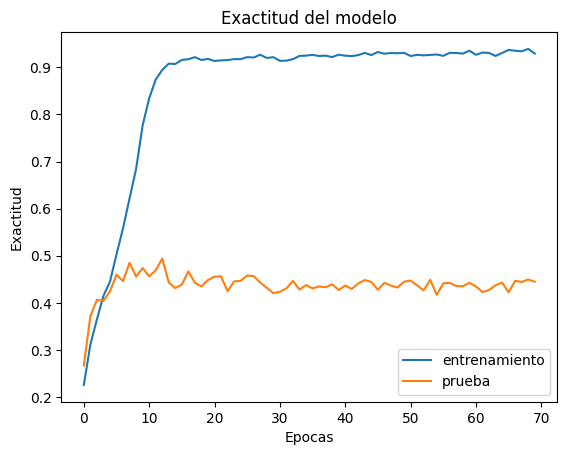

In [ ]:
plt.figure()
plt.plot(evol.history["accuracy"])
plt.plot(evol.history["val_accuracy"])
plt.title("Exactitud del modelo")
plt.ylabel("Exactitud")
plt.xlabel("Epocas")
plt.legend(["entrenamiento", "prueba"])
plt.show()

In [ ]:
datagen= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=30, zoom_range= .05, width_shift_range= .1, height_shift_range= .1, horizontal_flip= True, vertical_flip= True, channel_shift_range= .5)

In [ ]:
modelo.compile(optimizer= "adam", loss= "sparse_categorical_crossentropy", metrics= ["accuracy"])
evol= modelo.fit(datagen.flow(img_entrenamiento, etq_entrenamiento, batch_size=130), validation_data= (img_prueba, etq_prueba), epochs=130, batch_size=130)

Epoch 1/130
52/52 [==============================] - 41s 684ms/step - loss: 1.8284 - accuracy: 0.3060 - val_loss: 1.4813 - val_accuracy: 0.4259
Epoch 2/130
52/52 [==============================] - 34s 660ms/step - loss: 1.5942 - accuracy: 0.3533 - val_loss: 1.4137 - val_accuracy: 0.4573
Epoch 3/130
52/52 [==============================] - 34s 648ms/step - loss: 1.5509 - accuracy: 0.3751 - val_loss: 1.3842 - val_accuracy: 0.4751
Epoch 4/130
52/52 [==============================] - 35s 663ms/step - loss: 1.5152 - accuracy: 0.3835 - val_loss: 1.3797 - val_accuracy: 0.4716
Epoch 5/130
52/52 [==============================] - 34s 657ms/step - loss: 1.4740 - accuracy: 0.4124 - val_loss: 1.3898 - val_accuracy: 0.4591
Epoch 6/130
52/52 [==============================] - 35s 661ms/step - loss: 1.4615 - accuracy: 0.4201 - val_loss: 1.3280 - val_accuracy: 0.4917
Epoch 7/130
52/52 [==============================] - 35s 667ms/step - loss: 1.4446 - accuracy: 0.4257 - val_loss: 1.3049 - val_accuracy:

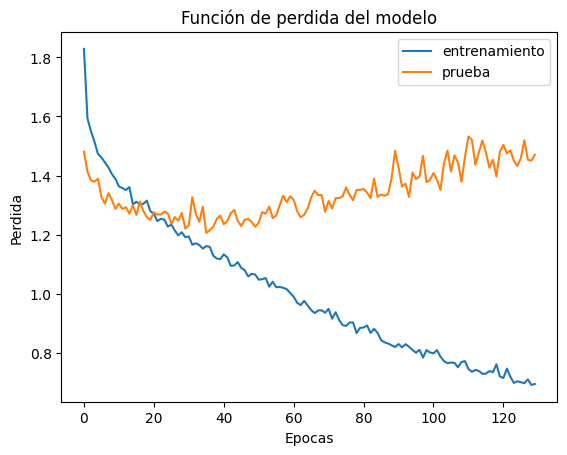

In [ ]:
plt.figure()
plt.plot(evol.history["loss"])
plt.plot(evol.history["val_loss"])
plt.title("Función de perdida del modelo")
plt.ylabel("Perdida")
plt.xlabel("Epocas")
plt.legend(["entrenamiento", "prueba"])
plt.show()

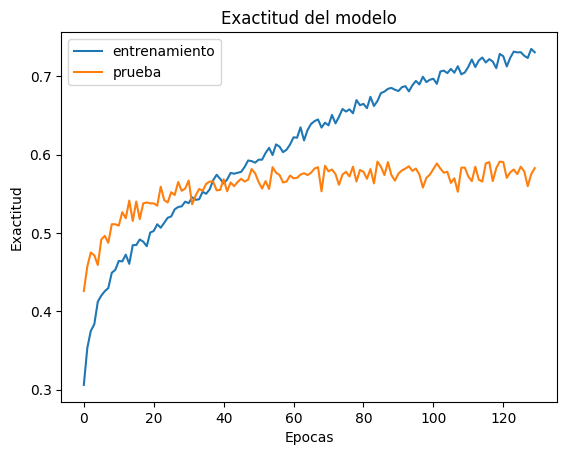

In [ ]:
plt.figure()
plt.plot(evol.history["accuracy"])
plt.plot(evol.history["val_accuracy"])
plt.title("Exactitud del modelo")
plt.ylabel("Exactitud")
plt.xlabel("Epocas")
plt.legend(["entrenamiento", "prueba"])
plt.show()

In [ ]:
predicciones= modelo.predict(img_prueba)
predicciones_etq= np.argmax(predicciones, axis= 1)
clase_correcta= []
clase_incorrecta= []
numero_objetos= 8
i=0
for i in range (len(etq_prueba)):
  if (etq_prueba[i]== predicciones_etq[i]):
    clase_correcta.append(i)
  if(len(clase_correcta)== numero_objetos):
    break

i=0
for i in range (len(etq_prueba)):
  if (not etq_prueba[i]== predicciones_etq[i]):
    clase_incorrecta.append(i)
  if(len(clase_incorrecta)== numero_objetos):
    break

53/53 [==============================] - 1s 8ms/step


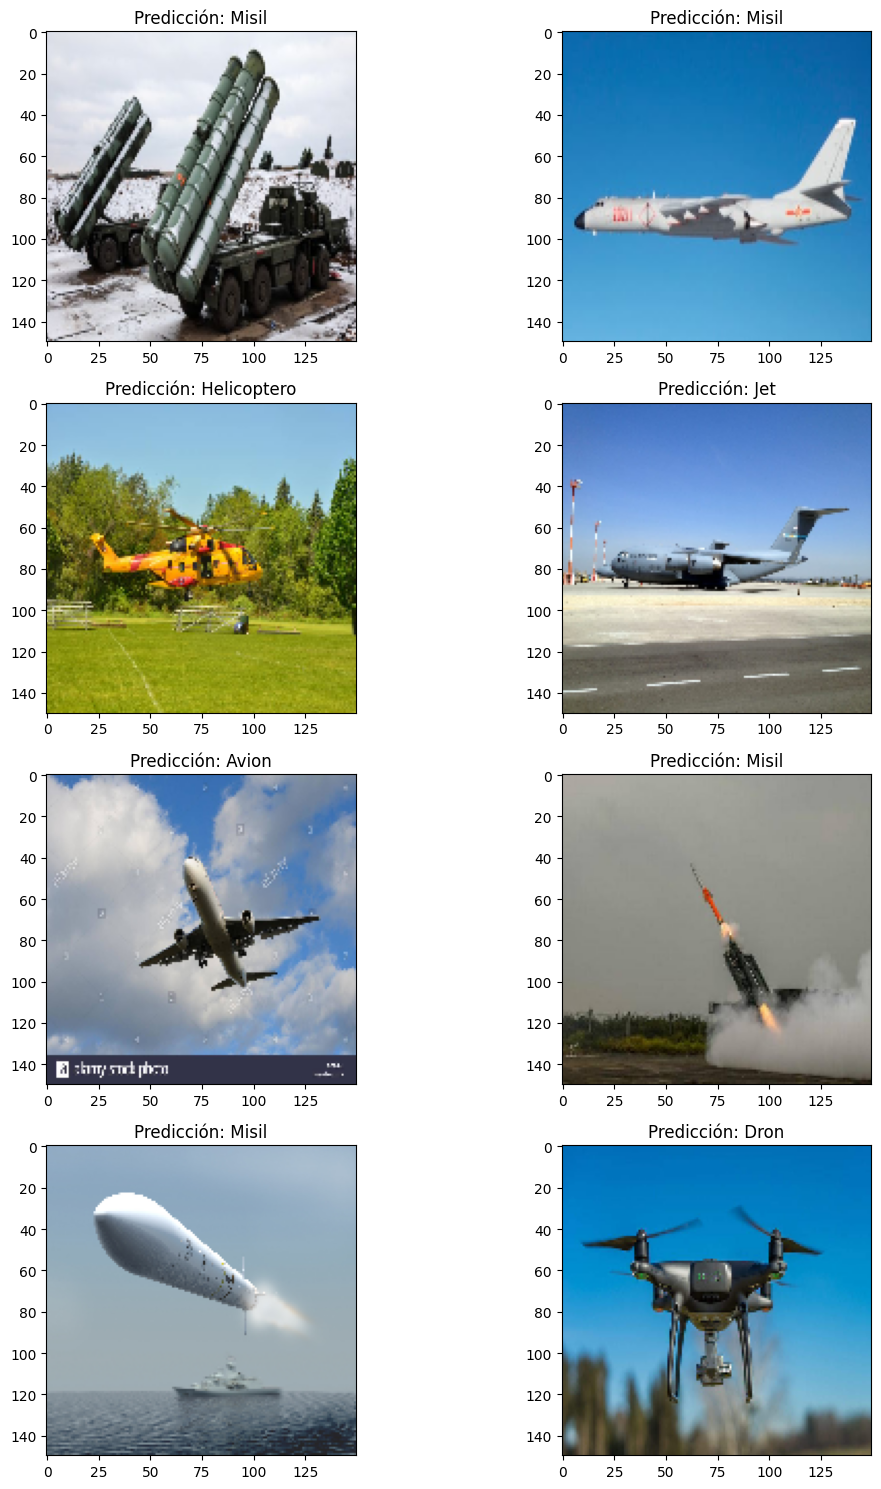

In [ ]:
contador=0
fig,ax= plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
  for j in range (2):
    ax[i,j].imshow(img_prueba[clase_correcta[contador]])
    ax[i,j].set_title("Predicción: "+clases[predicciones_etq[clase_correcta[contador]]])
    plt.tight_layout()
    contador+=1

In [ ]:
modelo.save("modelo desde cero.h5")

--------

-------

------

---------

-------

In [ ]:
#Segundo modelo

dir_base = "/content/drive/MyDrive/Colab Notebooks/DeepLearning TensorFlow/objetos 4"

dir_base= pathlib.Path(dir_base)

In [ ]:
def obtener_formato (dir_base):
  for root, dirs, files in os.walk(dir_base):
    print("Directorio:", root)
    formatos= set()
    for file in files:
      _, ext= os.path.splitext(file)
      formatos.add(ext.lower())
    print("Formatos:", formatos)
    print()

In [ ]:
obtener_formato(dir_base)

Directorio: /content/drive/MyDrive/Colab Notebooks/DeepLearning TensorFlow/objetos 4
Formatos: set()

Directorio: /content/drive/MyDrive/Colab Notebooks/DeepLearning TensorFlow/objetos 4/dron
Formatos: {'.png', '.gif', '.jpeg'}

Directorio: /content/drive/MyDrive/Colab Notebooks/DeepLearning TensorFlow/objetos 4/cohete
Formatos: {'.png', '.gif', '.jpeg'}

Directorio: /content/drive/MyDrive/Colab Notebooks/DeepLearning TensorFlow/objetos 4/misil
Formatos: {'.png', '.gif', '.jpeg'}

Directorio: /content/drive/MyDrive/Colab Notebooks/DeepLearning TensorFlow/objetos 4/avion
Formatos: {'.png', '.gif', '.jpeg'}

Directorio: /content/drive/MyDrive/Colab Notebooks/DeepLearning TensorFlow/objetos 4/jet
Formatos: {'.png', '.gif', '.jpeg'}

Directorio: /content/drive/MyDrive/Colab Notebooks/DeepLearning TensorFlow/objetos 4/helicoptero
Formatos: {'.png', '.gif', '.jpeg'}



In [ ]:
tam_lote= 32
alto_img= 224
ancho_img= 224

In [ ]:
conjunto_entrenamiento= tf.keras.preprocessing.image_dataset_from_directory(dir_base, validation_split= .2, subset= "training", seed= 53, image_size= (alto_img, ancho_img), batch_size= tam_lote)
conjunto_prueba= tf.keras.preprocessing.image_dataset_from_directory(dir_base, validation_split= .2, subset= "validation", seed= 53, image_size= (alto_img, ancho_img), batch_size= tam_lote)

Found 798 files belonging to 6 classes.
Using 639 files for training.
Found 798 files belonging to 6 classes.
Using 159 files for validation.


In [ ]:
nombre_clases= conjunto_entrenamiento.class_names

print(nombre_clases)

['avion', 'cohete', 'dron', 'helicoptero', 'jet', 'misil']


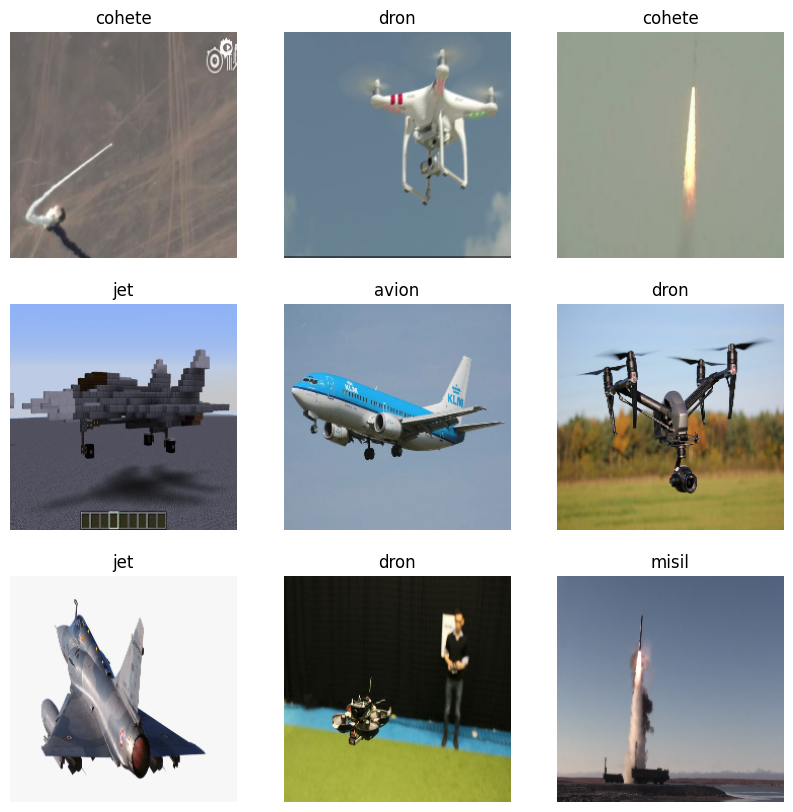

In [ ]:
plt.figure(figsize=(10,10))
for img, eti in conjunto_entrenamiento.take(1):
  for i in range(9):
    ax= plt.subplot(3,3,i+1)
    plt.imshow(img[i].numpy().astype("uint8"))
    plt.title(nombre_clases[eti[i]])
    plt.axis("off")

In [ ]:
for lote_img, lote_etq in conjunto_entrenamiento:
  print(lote_img.shape)
  print(lote_etq.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
autotune= tf.data.AUTOTUNE

conjunto_entrenamiento= conjunto_entrenamiento.cache().shuffle(1000).prefetch(buffer_size= autotune)
conjunto_prueba= conjunto_prueba.cache().prefetch(buffer_size= autotune)


In [ ]:
#modelo 2
FORMA_IMG= (224, 224, 3)

modelo_base= tf.keras.applications.MobileNetV2(input_shape= FORMA_IMG, include_top= False, weights="imagenet")

modelo_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
modelo_base.trainable= False
modelo_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
capa_normalizacion= tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape= FORMA_IMG)
capa_prom_global= tf.keras.layers.GlobalAveragePooling2D()
capa_prediccion= tf.keras.layers.Dense(6, activation= "softmax")
capa_aumento= Sequential([RandomFlip("horizontal"), RandomRotation(.1), RandomZoom(.1)])

In [ ]:
#
modelo_final= tf.keras.Sequential([capa_normalizacion,  capa_aumento,   modelo_base, Dropout (.5), capa_prom_global, capa_prediccion])
modelo_final.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 sequential_4 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 1280)        0         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 6)                

In [ ]:
tasa_aprendizaje_base= .001
modelo_final.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= tasa_aprendizaje_base), loss= "sparse_categorical_crossentropy", metrics=["accuracy"])


In [ ]:
perdida0,exactitud0= modelo_final.evaluate(conjunto_prueba)



5/5 [==============================] - 2s 51ms/step - loss: 1.9625 - accuracy: 0.1824


In [ ]:
historial= modelo_final.fit( conjunto_entrenamiento, epochs= 10, validation_data= conjunto_prueba)

historial

Epoch 1/10
20/20 [==============================] - 4s 58ms/step - loss: 0.9803 - accuracy: 0.6526 - val_loss: 1.1897 - val_accuracy: 0.5472
Epoch 2/10
20/20 [==============================] - 1s 56ms/step - loss: 0.3126 - accuracy: 0.9108 - val_loss: 1.2546 - val_accuracy: 0.5597
Epoch 3/10
20/20 [==============================] - 1s 56ms/step - loss: 0.2244 - accuracy: 0.9327 - val_loss: 1.2228 - val_accuracy: 0.5849
Epoch 4/10
20/20 [==============================] - 1s 56ms/step - loss: 0.1888 - accuracy: 0.9311 - val_loss: 1.2839 - val_accuracy: 0.5849
Epoch 5/10
20/20 [==============================] - 1s 57ms/step - loss: 0.1626 - accuracy: 0.9437 - val_loss: 1.2654 - val_accuracy: 0.5723
Epoch 6/10
20/20 [==============================] - 1s 56ms/step - loss: 0.1501 - accuracy: 0.9421 - val_loss: 1.3290 - val_accuracy: 0.5723
Epoch 7/10
20/20 [==============================] - 1s 56ms/step - loss: 0.1284 - accuracy: 0.9562 - val_loss: 1.3221 - val_accuracy: 0.5786
Epoch 8/10
20

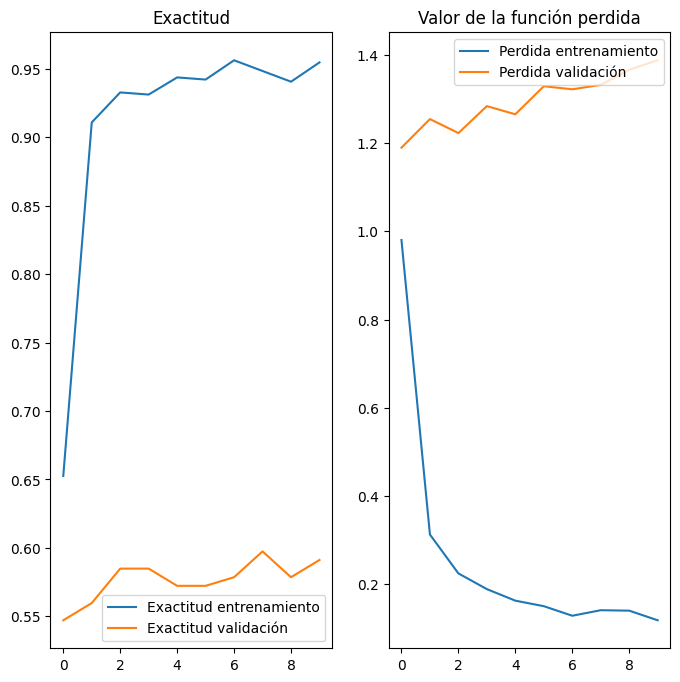

In [ ]:
exactitud= historial.history["accuracy"]
exactitud_val= historial.history["val_accuracy"]

perdida= historial.history["loss"]
perdida_val= historial.history["val_loss"]

rango_epoca= range(10)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epoca, exactitud, label= "Exactitud entrenamiento")
plt.plot(rango_epoca, exactitud_val, label= "Exactitud validación")
plt.legend (loc="lower right")
plt.title("Exactitud")

plt.subplot(1,2,2)
plt.plot(rango_epoca, perdida, label= "Perdida entrenamiento")
plt.plot(rango_epoca, perdida_val, label= "Perdida validación")
plt.legend (loc="upper right")
plt.title("Valor de la función perdida")
plt.show()

In [ ]:
modelo_final.save("modelo_final.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


-------------------------------------------

-------------------------------------------



-------------------------------------------

----------------------------------------

------------------------------------------------------


---------------------------------------------------


In [ ]:
#Tercer modelo

In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/drive/MyDrive/Colab Notebooks/DeepLearning TensorFlow/keras_model.h5", compile=False)

# Load the labels
class_names = open("/content/drive/MyDrive/Colab Notebooks/DeepLearning TensorFlow/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("/content/drive/MyDrive/Colab Notebooks/DeepLearning TensorFlow/objetos/jet/00000010.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)


1/1 [==============================] - 1s 756ms/step
Class: Cohete 
Confidence Score: 0.31997377


---------------------------

-----------------------------------

-----------------------------------------

In [ ]:
#prueba de modelo 1

modelo_cargado1= tf.keras.models.load_model("/content/modelo desde cero.h5")

base= "/content/drive/MyDrive/Colab Notebooks/DeepLearning TensorFlow/objetos"
base= pathlib.Path(base)
tam_lote= 32
alto_img= 150
ancho_img= 150

conj_prueba= tf.keras.preprocessing.image_dataset_from_directory(base, validation_split= .2, subset= "validation", seed=53, image_size= (alto_img, ancho_img), batch_size= tam_lote, shuffle= False)



Found 8439 files belonging to 6 classes.
Using 1687 files for validation.


In [ ]:
nombre_clases= conj_prueba.class_names
nombre_clases

['avion', 'cohete', 'dron', 'helicoptero', 'jet', 'misil']

In [ ]:
perdida_prueba, exactitud_prueba= modelo_cargado1.evaluate(conj_prueba, batch_size= tam_lote, verbose= 1)

53/53 [==============================] - 23s 151ms/step - loss: 518.3485 - accuracy: 0.3130


53/53 [==============================] - 8s 141ms/step
Vector de salida de la red:  [0. 0. 1. 0. 0. 0.]
Indice del argumento mayor:  2
Predicción de la clase que genera el modelo:  dron
Clase real a la que pertenece la imagen:  jet


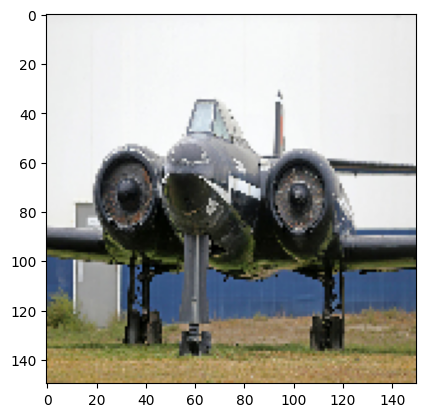

In [ ]:
predicciones= modelo_cargado1.predict(conj_prueba)

print("Vector de salida de la red: ",predicciones[20])
print("Indice del argumento mayor: ",np.argmax(predicciones[20]))
print("Predicción de la clase que genera el modelo: ",nombre_clases[np.argmax(predicciones[20])])
for lote_img, lote_etq in conj_prueba:
  plt.figure()
  plt.imshow(lote_img[20].numpy().astype(np.uint8))
  print("Clase real a la que pertenece la imagen: ",nombre_clases[lote_etq[20]])
  break

------------------------------

--------------------------------------------------

--------------------------------------

In [ ]:
#prueba Modelo 2
modelo_cargado= tf.keras.models.load_model("/content/modelo_final.h5")

In [ ]:
Dir_Base= "/content/drive/MyDrive/Colab Notebooks/DeepLearning TensorFlow/objetos 4"
Dir_Base= pathlib.Path(Dir_Base)

In [ ]:
tam_lote= 30
alto_img= 224
ancho_img= 224

conju_prueba= tf.keras.preprocessing.image_dataset_from_directory(Dir_Base, validation_split= .2, subset= "validation", seed= 53, image_size= (alto_img, ancho_img), batch_size= tam_lote, shuffle= False)

Found 798 files belonging to 6 classes.
Using 159 files for validation.


In [ ]:
nom_clas= conju_prueba.class_names
nom_clas

['avion', 'cohete', 'dron', 'helicoptero', 'jet', 'misil']

In [ ]:
perdida_prueba, exactitud_prueba= modelo_cargado.evaluate(conju_prueba, batch_size= tam_lote, verbose= 1)

6/6 [==============================] - 4s 232ms/step - loss: 0.3706 - accuracy: 0.8742


In [ ]:
historial= modelo_cargado.fit(conjunto_entrenamiento, epochs= 10, validation_data= conju_prueba)

Epoch 1/10
20/20 [==============================] - 4s 89ms/step - loss: 0.1112 - accuracy: 0.9546 - val_loss: 0.4124 - val_accuracy: 0.8742
Epoch 2/10
20/20 [==============================] - 2s 84ms/step - loss: 0.1127 - accuracy: 0.9515 - val_loss: 0.3635 - val_accuracy: 0.8931
Epoch 3/10
20/20 [==============================] - 2s 90ms/step - loss: 0.1009 - accuracy: 0.9562 - val_loss: 0.3684 - val_accuracy: 0.8805
Epoch 4/10
20/20 [==============================] - 2s 83ms/step - loss: 0.1074 - accuracy: 0.9499 - val_loss: 0.3883 - val_accuracy: 0.8805
Epoch 5/10
20/20 [==============================] - 2s 83ms/step - loss: 0.1241 - accuracy: 0.9452 - val_loss: 0.4020 - val_accuracy: 0.8868
Epoch 6/10
20/20 [==============================] - 2s 82ms/step - loss: 0.1154 - accuracy: 0.9499 - val_loss: 0.3979 - val_accuracy: 0.8805
Epoch 7/10
20/20 [==============================] - 2s 84ms/step - loss: 0.0973 - accuracy: 0.9562 - val_loss: 0.4216 - val_accuracy: 0.8742
Epoch 8/10
20

Con los resultados de los modelos cargados, se decide utilizar el segundo modelo preentrenado, ya que este tiene los mejores resultados de acuerdo al valor de exactitud, a diferencia de los otros dos modelos.
